In [1]:
import random
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as stats
%matplotlib inline

In [2]:
tickers=['AAPL','CAT','CVX','JPM','WMT']

In [3]:
df=yf.download(tickers,start='2011-12-30',end='2022-12-31')['Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
df

,AAPL,CAT,CVX,JPM,WMT
Date,,,,,
2011-12-29,14.468571,90.580002,107.470001,33.419998,59.990002
2011-12-30,14.464286,90.599998,106.400002,33.250000,59.759998
2012-01-03,14.686786,93.980003,110.370003,34.980000,60.330002
2012-01-04,14.765714,94.849998,110.180000,34.950001,59.709999
2012-01-05,14.929643,95.519997,109.099998,35.680000,59.419998
...,...,...,...,...,...
2022-12-23,131.860001,239.869995,177.399994,131.279999,143.770004
2022-12-27,130.029999,243.139999,179.630005,131.740005,143.809998
2022-12-28,126.040001,239.380005,176.979996,132.460007,141.289993


In [9]:
returns=np.array(df.pct_change()[1:].values.T)
returns.shape

(5, 2769)

In [10]:
closes=np.array(df.values.T)
closes

array([[ 14.46857071,  14.46428585,  14.6867857 , ..., 126.04000092,
        129.61000061, 129.92999268],
       [ 90.58000183,  90.59999847,  93.98000336, ..., 239.38000488,
        240.19999695, 239.55999756],
       [107.47000122, 106.40000153, 110.37000275, ..., 176.97999573,
        178.32000732, 179.49000549],
       [ 33.41999817,  33.25      ,  34.97999954, ..., 132.46000671,
        133.22000122, 134.1000061 ],
       [ 59.99000168,  59.75999832,  60.33000183, ..., 141.28999329,
        142.1499939 , 141.78999329]])

In [11]:
pval=10000
w=np.array([1/len(df.columns) for i in range(len(df.columns))])
w

array([0.2, 0.2, 0.2, 0.2, 0.2])

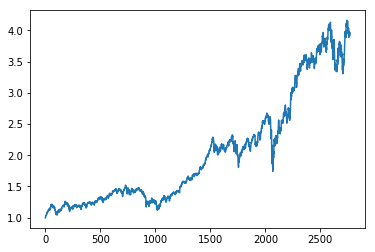

In [12]:
plt.plot(np.cumprod(np.dot(w,returns)+1))

In [13]:
port_shares=np.array([(pval/len(df.columns))/df[df.columns[i]][0] for i in range(len(df.columns))])
port_shares

array([138.23065458,  22.0799289 ,  18.6098444 ,  59.84440783,
        33.33888888])

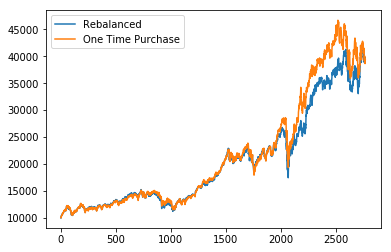

In [14]:
plt.plot(np.cumprod(np.dot(w,returns)+1)*pval)
plt.plot(np.dot(port_shares,closes))
plt.legend(['Rebalanced','One Time Purchase'])

In [15]:
onetime=np.dot(port_shares,closes)
onetime[-1]

39342.31300882846

In [16]:
new_pval=(closes[0][-1]*138.23065458+closes[1][-1]*22.0799289+closes[2][-1]*18.6098444+closes[3][-1]*59.84440783+closes[4][-1]*33.33888888)
new_pval

39342.31300983531

In [17]:
(closes[0][-1]+closes[1][-1]+closes[2][-1]+closes[3][-1]+closes[4][-1])*0.2

164.9739990234375

In [18]:
(closes[0][-1]*138.23065458)/new_pval

0.4565137777399588

In [19]:
(closes[1][-1]*22.0799289)/new_pval

0.13444729881681317

In [20]:
(closes[2][-1]*18.6098444)/new_pval

0.0849030170836138

In [21]:
(closes[3][-1]*59.84440783)/new_pval

0.20398229898831954

In [22]:
closes[4][-1]*33.33888888/new_pval

0.12015360737129462

In [23]:
0.4565137777399588+0.13444729881681317+0.0849030170836138+0.20398229898831954+0.12015360737129462

1.0